# 画图函数参考部分

In [1]:
# coding=utf-8
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
from scipy.optimize import leastsq
from scipy import stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicSpline
import scipy as sp
import math

In [51]:
cmaps = [('Perceptually Uniform Sequential',
          ['viridis', 'inferno', 'plasma', 'magma']),
         ('Sequential', ['Blues', 'BuGn', 'BuPu',
                         'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                         'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                         'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter']),
         ('Diverging', ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                        'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                        'seismic']),
         ('Qualitative', ['Accent', 'Dark2', 'Paired', 'Pastel1',
                          'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous', ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                            'brg', 'CMRmap', 'cubehelix',
                            'gnuplot', 'gnuplot2', 'gist_ncar',
                            'nipy_spectral', 'jet', 'rainbow',
                            'gist_rainbow', 'hsv', 'flag', 'prism'])]

In [11]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']  # FangSong/黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

## 1. 绘制正态分布概率密度函数

(51,)
x = 
 [-3.   -2.88 -2.76 -2.64 -2.52 -2.4  -2.28 -2.16 -2.04 -1.92 -1.8  -1.68
 -1.56 -1.44 -1.32 -1.2  -1.08 -0.96 -0.84 -0.72 -0.6  -0.48 -0.36 -0.24
 -0.12  0.    0.12  0.24  0.36  0.48  0.6   0.72  0.84  0.96  1.08  1.2
  1.32  1.44  1.56  1.68  1.8   1.92  2.04  2.16  2.28  2.4   2.52  2.64
  2.76  2.88  3.  ]
(51,)
y = 
 [0.00443185 0.00630673 0.00884645 0.01223153 0.0166701  0.02239453
 0.02965458 0.03870686 0.04980009 0.06315656 0.07895016 0.09728227
 0.1181573  0.14145997 0.16693704 0.19418605 0.2226535  0.25164434
 0.28034381 0.30785126 0.3332246  0.35553253 0.37391061 0.38761662
 0.39608021 0.39894228 0.39608021 0.38761662 0.37391061 0.35553253
 0.3332246  0.30785126 0.28034381 0.25164434 0.2226535  0.19418605
 0.16693704 0.14145997 0.1181573  0.09728227 0.07895016 0.06315656
 0.04980009 0.03870686 0.02965458 0.02239453 0.0166701  0.01223153
 0.00884645 0.00630673 0.00443185]


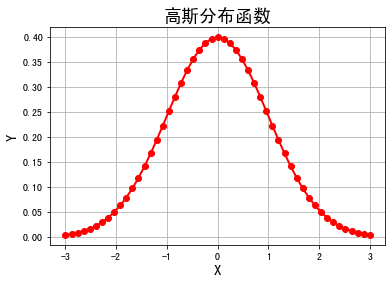

In [12]:
mu = 0
sigma = 1
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 51)
y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
print(x.shape)
print('x = \n', x)
print(y.shape)
print('y = \n', y)
# plt.figure(facecolor='w')
plt.plot(x, y, 'ro-', linewidth=2)
# plt.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('高斯分布函数', fontsize=18)
plt.grid(True)
plt.show()

## 2 损失函数：Logistic损失(-1,1)/SVM Hinge损失/ 0/1损失

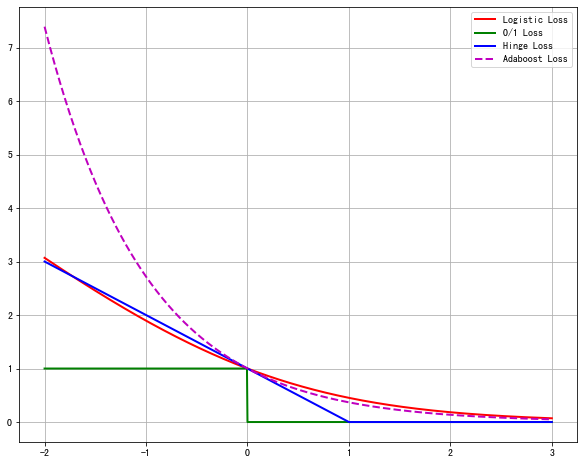

In [14]:
plt.figure(figsize=(10,8))
x = np.linspace(start=-2, stop=3, num=1001, dtype=np.float)
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
plt.plot(x, y_boost, 'm--', label='Adaboost Loss', linewidth=2)
plt.grid()
plt.legend(loc='upper right')
plt.savefig('1.png')
plt.show()

## 3 x^x

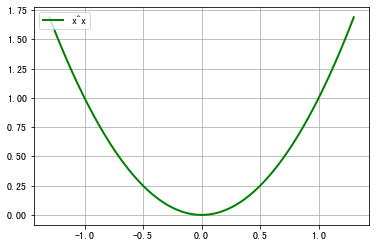

In [15]:
f = lambda x: x**2
plt.figure(facecolor='w')
x = np.linspace(-1.3, 1.3, 101)
y = f(x)
plt.plot(x, y, 'g-', label='x^x', linewidth=2)
plt.grid()
plt.legend(loc='upper left')
plt.show()

## 4 胸型线

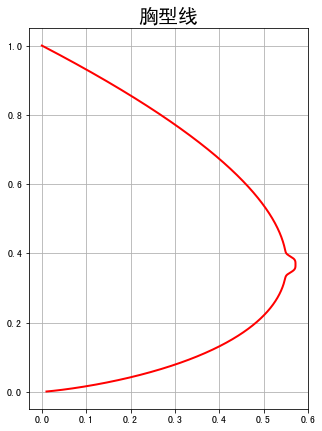

In [16]:
x = np.arange(1, 0, -0.001)
y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
plt.figure(figsize=(5,7), facecolor='w')
plt.plot(y, x, 'r-', linewidth=2)
plt.grid(True)
plt.title(u'胸型线', fontsize=20)
# plt.savefig('breast.png')
plt.show()

## 5 心形线

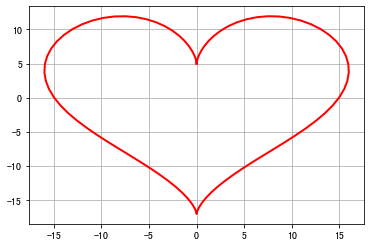

In [17]:
t = np.linspace(0, 2*np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
plt.plot(x, y, 'r-', linewidth=2)
plt.grid(True)
plt.show()

## 6 渐开线

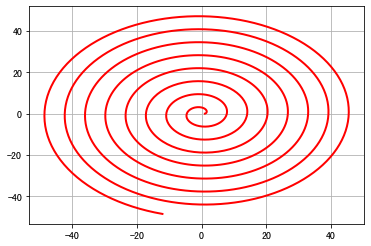

In [18]:
t = np.linspace(0, 50, num=1000)
x = t*np.sin(t) + np.cos(t)
y = np.sin(t) - t*np.cos(t)
plt.plot(x, y, 'r-', linewidth=2)
plt.grid()
plt.show()

## 7 bar

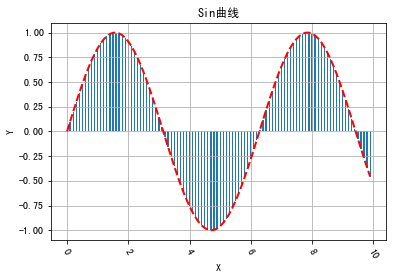

In [19]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.bar(x, y, width=0.04, linewidth=0.2)
plt.plot(x, y, 'r--', linewidth=2)
plt.title(u'Sin曲线')
plt.xticks(rotation=-60)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

## 8.1 均匀分布

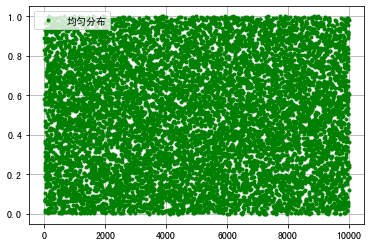

In [20]:
x = np.random.rand(10000)
t = np.arange(len(x))
# plt.hist(x, 30, color='m', alpha=0.5, label=u'均匀分布')
plt.plot(t, x, 'g.', label='均匀分布')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## 8.2 中心极限定律

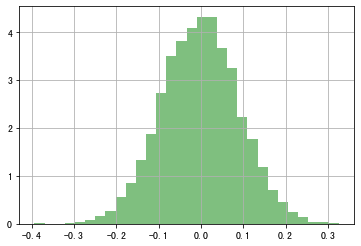

In [25]:
t = 1000
a = np.zeros(10000)
for i in range(t):
    a += np.random.uniform(-5, 5, 10000)
a /= t
plt.hist(a, bins=30, color='g', alpha=0.5, density=True, label=u'均匀分布叠加')
# plt.legend(loc='upper left')
plt.grid()
plt.show()

## 8.3 其他分布的中心极限定律

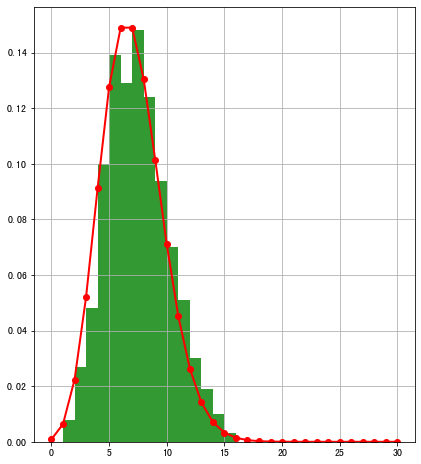

In [27]:
lamda = 7
p = stats.poisson(lamda)
y = p.rvs(size=1000)
mx = 30
r = (0, mx)
bins = r[1] - r[0]
plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.hist(y, bins=bins, range=r, color='g', alpha=0.8, density=True)
t = np.arange(0, mx+1)
plt.plot(t, p.pmf(t), 'ro-', lw=2)
plt.grid(True)

/var/folders/s9/pvz1qvg50h5g8mmd077zmqrm0000gn/T/ipykernel_45107/2667887221.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


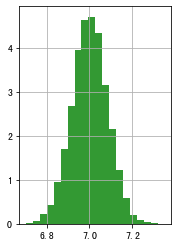

[2 6 6 ... 3 1 4]


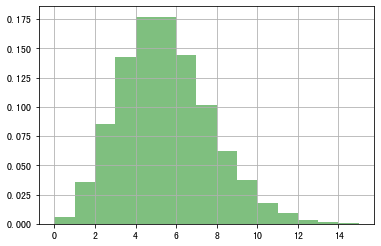

In [31]:
N = 1000
M = 10000
plt.subplot(122)
a = np.zeros(M, dtype=np.float)
p = stats.poisson(lamda)
for i in np.arange(N):
    a += p.rvs(size=M)
a /= N
plt.hist(a, bins=20, color='g', alpha=0.8, density=True)
plt.grid(b=True)
plt.show()

## 8.4 泊松分布

[8 2 8 ... 7 8 7]


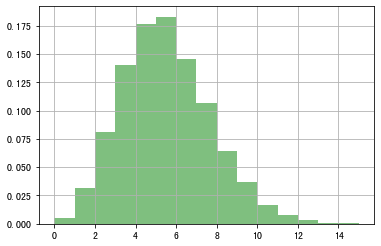

In [33]:
x = np.random.poisson(lam=5, size=10000)
print(x)
pillar = 15
a = plt.hist(x, bins=pillar, density=True, range=[0, pillar], color='g', alpha=0.5)
plt.grid()
plt.show()

## 8.5 泊松分布

/var/folders/s9/pvz1qvg50h5g8mmd077zmqrm0000gn/T/ipykernel_45107/3779651633.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, ls=':')
/var/folders/s9/pvz1qvg50h5g8mmd077zmqrm0000gn/T/ipykernel_45107/3779651633.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, ls=':')


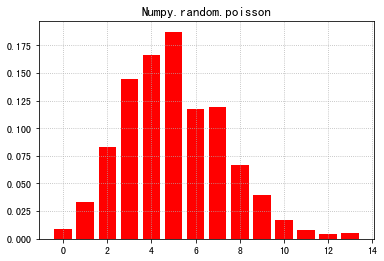

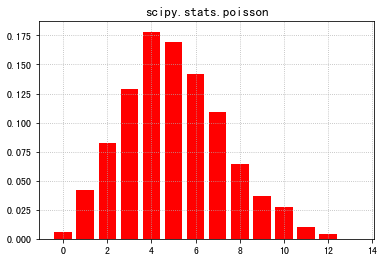

In [45]:
size = 1000
lamda = 5
p = np.random.poisson(lam=lamda, size=size)
plt.figure()
plt.hist(p, bins=range(3 * lamda), histtype='bar', align='left', color='r', rwidth=0.8, density=True)
plt.grid(b=True, ls=':')
# plt.xticks(range(0, 15, 2))
plt.title('Numpy.random.poisson', fontsize=13)

plt.figure()
r = stats.poisson(mu=lamda)
p = r.rvs(size=size)
plt.hist(p, bins=range(3 * lamda), color='r', align='left', rwidth=0.8, density=True)
plt.grid(b=True, ls=':')
plt.title('scipy.stats.poisson', fontsize=13)
plt.show()

## 9 直方图的使用

[3.50729983 0.37438287 2.46824806 1.09055483 3.80139271]


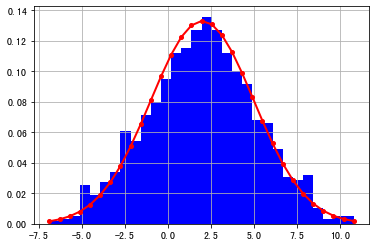

In [40]:
mu = 2
sigma = 3
data = mu + sigma * np.random.randn(1000)

# 打印出前面5个
print(data[0:5])
h = plt.hist(data, 30, density=1, color='b')
x = h[1]
y = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y, 'r-', x, y, 'ro', linewidth=2, markersize=4)
plt.grid()
plt.show()


## 10 插值

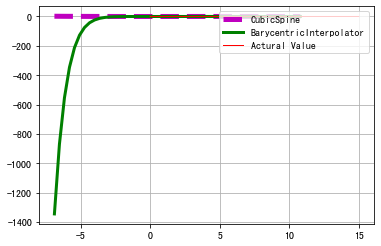

In [41]:
rv = poisson(5)
x1 = a[1]
y1 = rv.pmf(x1)
itp = BarycentricInterpolator(x1, y1)  # 重心插值
x2 = np.linspace(x.min(), x.max(), 50)
y2 = itp(x2)
cs = sp.interpolate.CubicSpline(x1, y1)       # 三次样条插值
plt.plot(x2, cs(x2), 'm--', linewidth=5, label='CubicSpine')           # 三次样条插值
plt.plot(x2, y2, 'g-', linewidth=3, label='BarycentricInterpolator')   # 重心插值
plt.plot(x1, y1, 'r-', linewidth=1, label='Actural Value')             # 原始值
plt.legend(loc='upper right')
plt.grid()
plt.show()

## 11 绘制三维图

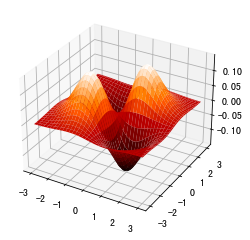

In [50]:
# 7. 绘制三维图像
x, y = np.mgrid[-3:3:7j, -3:3:7j]
# print(x, y)
u = np.linspace(-3, 3, 101)
x, y = np.meshgrid(u, u)
# print(x, y)
z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
# z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.coolwarm, linewidth=0.1)  #
ax.plot_surface(x, y, z, rstride=3, cstride=3, cmap=cm.gist_heat, linewidth=0.5)
plt.show()

## 11 两个曲线在同一个图

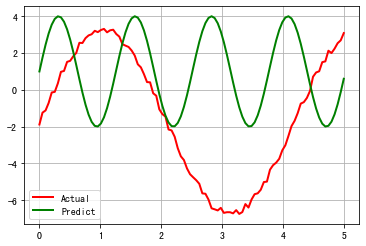

In [62]:
x = np.linspace(0, 5, 100)
a = 5
w = 1.5
phi = -2

y = a * np.sin(w*x) + phi + np.random.rand(len(x))*0.5
theta = [3 ,5, 1]

y_hat = theta[0] * np.sin(theta[1] * x) + theta[2]
plt.plot(x, y, 'r-', linewidth=2, label='Actual')
plt.plot(x, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='lower left')
plt.grid()
plt.show()

## 11.1 同时画两幅图

In [127]:
# 得到loss的log日志，进行解析画图
import matplotlib as mpl

def draw(path1, path2):
    # path1, lath2日志路径
    fr1 = open('path1','r+')
    fr2 = open('path2','r+')
    def listx_y(filename):
        xdata = []
        ydata = []
        for each_line1 in filename:
            each_line1 = each_line1.rstrip('\n')
            xdata.append(int(each_line1.split(' ')[0]))
            ydata.append(float(each_line1.split(' ')[1]))
    #     print 'the %s is '%filename,xdata
    #     print 'the %s is '%filename,ydata
        return xdata, ydata


    listX1, listY1 = listx_y(fr1)
    listX2, listY2 = listx_y(fr2)


    fig = plt.figure(figsize=(10,8),facecolor='white')
    ax = fig.add_subplot(111)
    class1 = plt.plot(listX1, listY1,'r-',label='inception loss',linewidth=1.5)
    class2 = plt.plot(listX2, listY2,'g-',label='resnet loss',linewidth=1.5)
    plt.legend(loc='upper right')
    plt.show()

    fr1.close()
    fr2.close()

## 12 画带有标签的散点图
### 强烈推荐一，代码最少，表现丰富

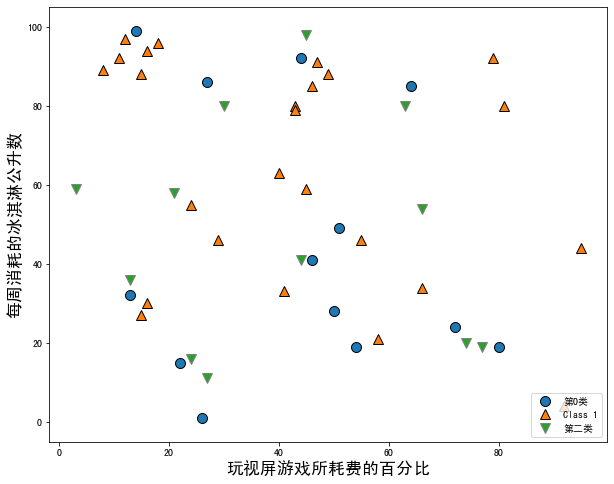

In [83]:
import os
import pandas as pd
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' # 只显示 Error

import mglearn
returnMat = np.random.randint(0, 100, (50, 2))
classLabelVector = np.random.randint(0, 3, 50).flatten()

plt.figure(figsize=(10,8),facecolor='white')
mglearn.discrete_scatter(returnMat[:, 0], returnMat[:, 1], classLabelVector)

plt.legend([u'第0类', u"Class 1",u'第二类'], loc=4)

plt.xlabel(u'玩视屏游戏所耗费的百分比',fontsize=17)
plt.ylabel(u'每周消耗的冰淇淋公升数',fontsize=17)
plt.show()

In [84]:
classLabelVector

array([2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1,
       2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 2])

## 12.1 散点图的第二种画法

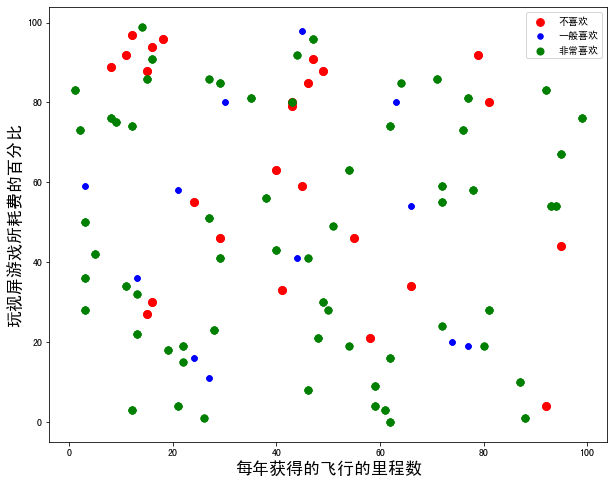

In [86]:

for i in range(0, 50):
    if classLabelVector[i]==1:
        x_1.append(returnMat[i][0])
        y_1.append(returnMat[i][1])
    elif classLabelVector[i]==2:
        x_2.append(returnMat[i][0])
        y_2.append(returnMat[i][1])
    else:
        x_3.append(returnMat[i][0])
        y_3.append(returnMat[i][1])

fig = plt.figure(figsize=(10,8),facecolor='white')
ax = fig.add_subplot(111)
class1 = ax.scatter(x_1, y_1, s=60,c='r')
class2 = ax.scatter(x_2, y_2, s=30,c='b')
class3 = ax.scatter(x_3,y_3, s=50,c='g')

# ax.scatter(returnMat[:,1],returnMat[:,2])
plt.xlabel(u'每年获得的飞行的里程数',fontsize=17)
plt.ylabel(u'玩视屏游戏所耗费的百分比',fontsize=17)
# ax.scatter(returnMat[:,0],returnMat[:,1],15.0*np.array(classLabelVector),15.0*np.array(classLabelVector))
plt.legend([class1,class2,class3],[u'不喜欢',u'一般喜欢',u'非常喜欢'],loc='upper right')
# plt.savefig('C:\\Users\\bruce\\Desktop\\scatter.jpg',format='jpg')
plt.show()

## 12.2 散点图的第三种画法

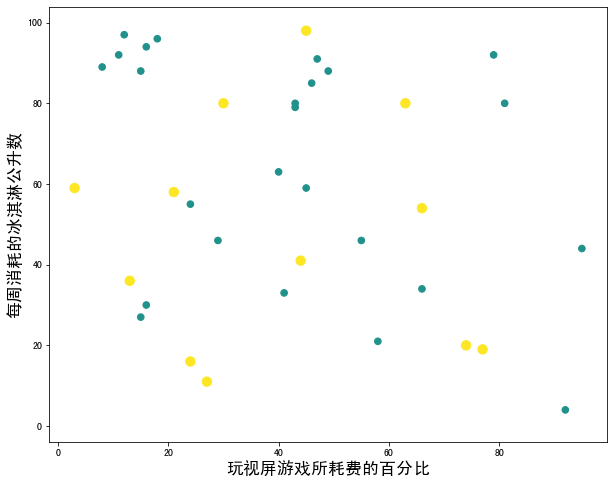

In [97]:
fig = plt.figure(figsize=(10, 8),facecolor='white')
ax = fig.add_subplot(111)
# ax.scatter(returnMat[:,1],returnMat[:,2])
plt.xlabel(u'玩视屏游戏所耗费的百分比',fontsize=17)
plt.ylabel(u'每周消耗的冰淇淋公升数',fontsize=17)
ax.scatter(returnMat[:,0], returnMat[:,1], 44.0*np.array(classLabelVector), 15.0*np.array(classLabelVector))
# ax.scatter(returnMat[:,1],returnMat[:,2])
# plt.savefig('C:\\Users\\bruce\\Desktop\\scatter.jpg',format='jpg')
# plt.legend()
plt.show()

## 12.3 散点图的第四种画法

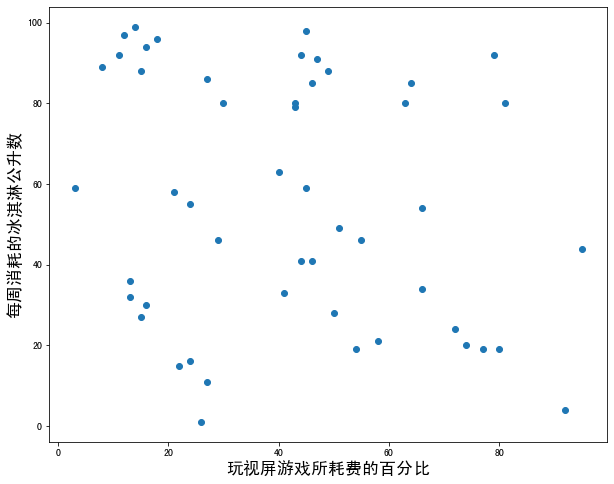

In [99]:
# fig = plt.figure(figsize=(10,8),facecolor='white')
plt.figure(figsize=(10,8),facecolor='white')
# fig.add_subplot(111)

# 没有加label的颜色进行区分
plt.scatter(returnMat[:,0],returnMat[:,1])
plt.xlabel(u'玩视屏游戏所耗费的百分比',fontsize=17)
plt.ylabel(u'每周消耗的冰淇淋公升数',fontsize=17)
# plt.scatter(returnMat[:,0],returnMat[:,1],15.0*np.array(classLabelVector),15.0*np.array(classLabelVector))
# plt.savefig('C:\\Users\\bruce\\Desktop\\scatter.jpg',format='jpg')
plt.show()

# 13 创建画布来绘画多个图像

In [103]:
'''
这里的所有画图都是基于matplotlib的模块来画图的
我们有两种分开表格绘图的方式：

fig = plt.figure() # 创建一个新的figure图片

fig,axes = plt.subplots(2, 2,sharex=True,sharey=True) # 创建一个方格的画布

以上都是基于 matplotlib 的模块的方法。下面是利用pandas本身的属性来解决问题
'''

'\n这里的所有画图都是基于matplotlib的模块来画图的\n我们有两种分开表格绘图的方式：\n\nfig = plt.figure() # 创建一个新的figure图片\n\nfig,axes = plt.subplots(2, 2,sharex=True,sharey=True) # 创建一个方格的画布\n'

### 13.1 第一种绘图方式

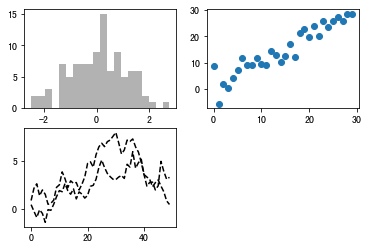

In [105]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)          # 直方图
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))      # 散点图
ax3.plot(np.random.randn(50).cumsum(),'k--')                        # 和 plt.plot功能是一样的
plt.show()

### 第二种绘图方式

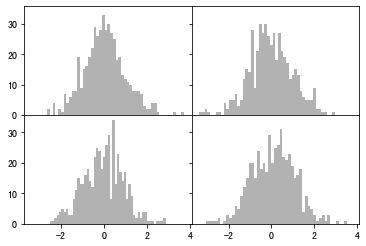

In [106]:
fig,axes = plt.subplots(2, 2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.3)
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

## 13.2 第三种绘图方式

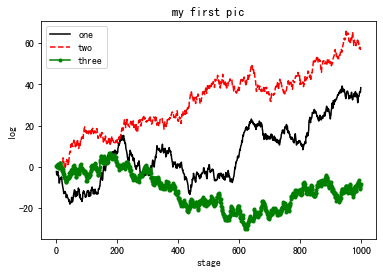

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'r--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'g.-',label='three')

ax.set_xlabel('stage')
ax.set_ylabel('log')

ax.set_title('my first pic')
ax.legend(loc='best')

plt.show()

## 14 使用pandas可以画图

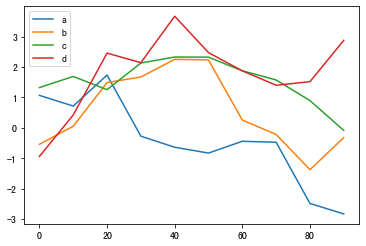

In [109]:
s = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['a','b','c','d'],index=np.arange(0,100,10))
s.plot()
plt.show()

### 13.1 Series和DataFram里面的都有axes[0]和axes[1]，分开两个子图，否则，那么就是单独的两个图像

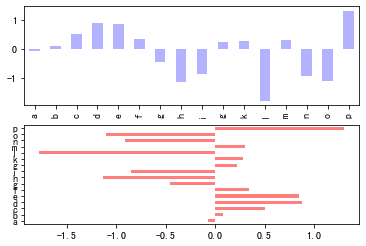

In [111]:

fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16),index=list('abcdefghigklmnop'))
data.plot(kind='bar',ax=axes[0],color='b',alpha=0.3)
data.plot(kind='barh',ax=axes[1],color='r',alpha=0.5)
# plt.savefig('C:\\Users\\bruce\\Desktop\\1.png',dpi=400,bbox_inches='tight') #分辨率是400，可以减除空白部分
plt.show()

### 13.2 

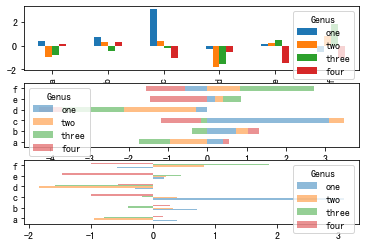

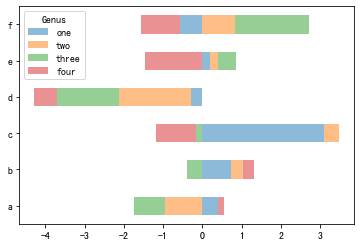

In [114]:
fig,axes = plt.subplots(3,1)

df = pd.DataFrame(np.random.randn(6,4),index=['a','b','c','d','e','f'],
                  columns=pd.Index(['one','two','three','four'],name='Genus'))

df.plot(kind='bar',ax = axes[0])
df.plot(kind='barh',ax = axes[1],stacked=True, alpha=0.5)  # 堆叠
df.plot(kind='barh',ax = axes[2],alpha=0.5)
df.plot(kind='barh',stacked=True,alpha=0.5)# 没有axes的话就是单独的一个图
plt.show()

### 13.3 直方图

[ 1.72254279 -0.15283925] [9.82566103 9.22647811]


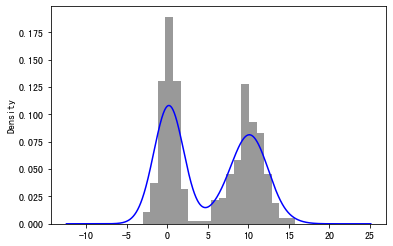

In [118]:
## 直方图
x = np.random.normal(0,1,size=200)
y = np.random.normal(10,2,size=200)

print(x[0:2], y[0:2])
value = pd.Series(np.concatenate([x,y]))
value.hist(bins=20,alpha=0.4,color='k',density=True)
value.plot(color='b',kind='kde')

plt.show()

### 13.3 散点图

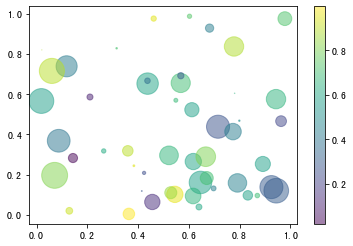

In [120]:
np.random.seed(0)
N= 50
x = np.random.rand(N)
y = np.random.rand(N)
c = np.random.rand(N)

area = np.pi*(15*np.random.rand(N))**2
plt.scatter(x,y,s = area,c = c, alpha=0.5)
plt.colorbar()
plt.show()

## 14 颜色处理方法

In [125]:
'''
https://www.cnblogs.com/darkknightzh/p/6117528.html
上面的博客地址详细的颜色配置说明方法；
选择一个合适的起点start，stop 范围，然后选择颜色变化范围，最后调用列表colors来实现每种颜色

'''
from matplotlib import cm
start = 0.6
stop = 1.0
number_of_lines = 2200
cm_subsection = np.linspace(start, stop, number_of_lines)
colors = [cm.jet(x) for x in cm_subsection ]


# marker	description
# ”.”	point
# ”,”	pixel
# “o”	circle
# “v”	triangle_down
# “^”	triangle_up
# “<”	triangle_left
# “>”	triangle_right
# “1”	tri_down
# “2”	tri_up
# “3”	tri_left
# “4”	tri_right
# “8”	octagon
# “s”	square
# “p”	pentagon
# “*”	star
# “h”	hexagon1
# “H”	hexagon2
# “+”	plus
# “x”	x
# “D”	diamond
# “d”	thin_diamond
# “|”	vline
# “_”	hline
# TICKLEFT	tickleft
# TICKRIGHT	tickright
# TICKUP	tickup
# TICKDOWN	tickdown
# CARETLEFT	caretleft
# CARETRIGHT	caretright
# CARETUP	caretup
# CARETDOWN	caretdown




In [126]:
colors[0:5]

[(0.8064516129032256, 1.0, 0.16129032258064513, 1.0),
 (0.8064516129032256, 1.0, 0.16129032258064513, 1.0),
 (0.8064516129032256, 1.0, 0.16129032258064513, 1.0),
 (0.8064516129032256, 1.0, 0.16129032258064513, 1.0),
 (0.8064516129032256, 1.0, 0.16129032258064513, 1.0)]

## 15 鸢尾花训练数据结果的可视化效果

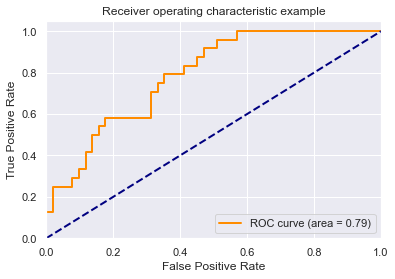

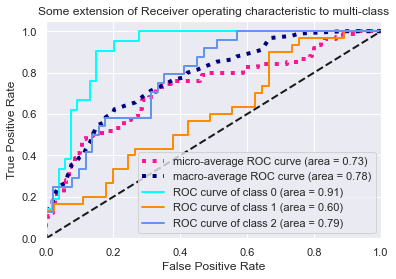

In [35]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp
from numpy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


### 16 seaborn库来画distplot直方图和核密度函数曲线

In [38]:
x=np.random.randn(100)

/Users/bruce/anaconda3/envs/pytorch_new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

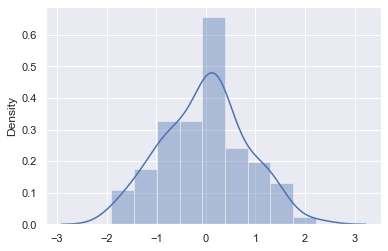

In [39]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns 
sns.set()  #切换到sns的默认运行配置

sns.distplot(x)

### distplot表示小面积，这里就是宽度乘以归一化之后的高度，表示的一种概率 

<AxesSubplot:ylabel='Count'>

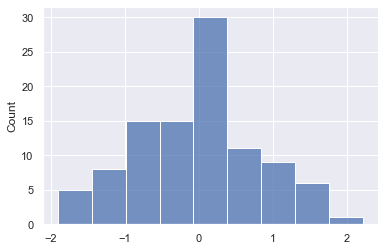

In [40]:
sns.histplot(x)

In [41]:
a = np.random.randint(0, 10, 500)
from collections import Counter
Counter(a)

Counter({6: 66, 9: 43, 0: 47, 1: 61, 4: 53, 7: 49, 8: 45, 2: 36, 3: 54, 5: 46})

In [46]:
a[0:5] # 显示a的数值

array([6, 6, 9, 0, 1])

<AxesSubplot:ylabel='Density'>

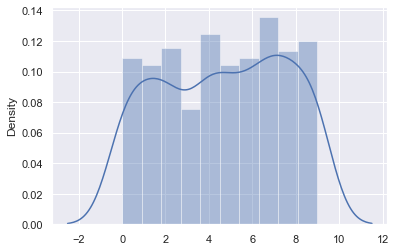

In [32]:
sns.distplot(a, bins=10,kde=True,norm_hist=True)

/Users/bruce/anaconda3/envs/pytorch_new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

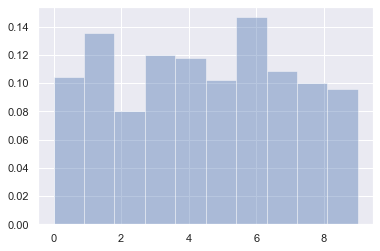

In [43]:
sns.distplot(a, bins=10,kde=False,norm_hist=True)

<AxesSubplot:ylabel='Density'>

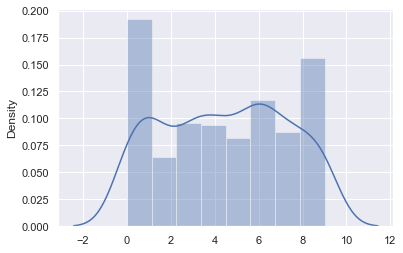

In [44]:
sns.distplot(a)